In [1]:
# Reference
# https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/

In [2]:
#set working directory
PATH = '/Users/shams/logic-lab/RegressionTutorial'
setwd(PATH)

In [3]:
#load data and check data
mydata <- read.csv("airfoil_self_noise.csv")
str(mydata)

'data.frame':	1503 obs. of  6 variables:
 $ Frquency.Hz.        : int  800 1000 1250 1600 2000 2500 3150 4000 5000 6300 ...
 $ Angle_of_Attack     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Chord_Length        : num  0.305 0.305 0.305 0.305 0.305 ...
 $ Free_stream_velocity: num  71.3 71.3 71.3 71.3 71.3 71.3 71.3 71.3 71.3 71.3 ...
 $ Displacement        : num  0.00266 0.00266 0.00266 0.00266 0.00266 ...
 $ Sound_pressure_level: num  126 125 126 128 127 ...


In [4]:
#check missing values
colSums(is.na(mydata))

Frquency.Hz.      Angle_of_Attack         Chord_Length 
                   0                    0                    0 
Free_stream_velocity         Displacement Sound_pressure_level 
                   0                    0                    0

In [5]:
cor(mydata)

,Frquency.Hz.,Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
Frquency.Hz.,1.000000000,-0.27276454,-0.003660639,0.133663831,-0.230107353,-0.3907114
Angle_of_Attack,-0.272764536,1.00000000,-0.504868150,0.058759565,0.753393785,-0.1561075
Chord_Length,-0.003660639,-0.50486815,1.000000000,0.003786629,-0.220842431,-0.2361615
Free_stream_velocity,0.133663831,0.05875957,0.003786629,1.000000000,-0.003974013,0.1251028
Displacement,-0.230107353,0.75339378,-0.220842431,-0.003974013,1.000000000,-0.3126695
Sound_pressure_level,-0.390711412,-0.15610753,-0.236161512,0.125102801,-0.312669506,1.0000000


In [6]:
regmodel <- lm(Sound_pressure_level ~ ., data = mydata)
summary(regmodel)


Call:
lm(formula = Sound_pressure_level ~ ., data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.480  -2.882  -0.209   3.152  16.064 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.328e+02  5.447e-01  243.87   <2e-16 ***
Frquency.Hz.         -1.282e-03  4.211e-05  -30.45   <2e-16 ***
Angle_of_Attack      -4.219e-01  3.890e-02  -10.85   <2e-16 ***
Chord_Length         -3.569e+01  1.630e+00  -21.89   <2e-16 ***
Free_stream_velocity  9.985e-02  8.132e-03   12.28   <2e-16 ***
Displacement         -1.473e+02  1.501e+01   -9.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.809 on 1497 degrees of freedom
Multiple R-squared:  0.5157,	Adjusted R-squared:  0.5141 
F-statistic: 318.8 on 5 and 1497 DF,  p-value: < 2.2e-16


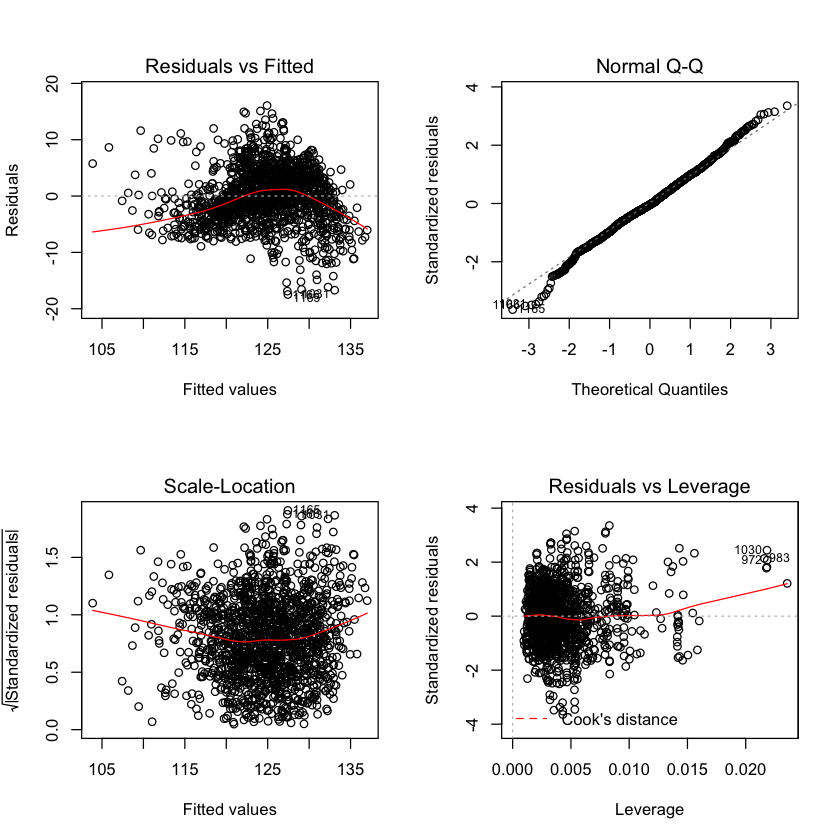

In [7]:
#set graphic output
par(mfrow=c(2,2))

#create residual plots
plot (regmodel)

In [8]:
regmodel <- update(regmodel, log(Sound_pressure_level)~.)
summary(regmodel)


Call:
lm(formula = log(Sound_pressure_level) ~ Frquency.Hz. + Angle_of_Attack + 
    Chord_Length + Free_stream_velocity + Displacement, data = mydata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146939 -0.023272 -0.000701  0.025425  0.122213 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.891e+00  4.393e-03 1113.31   <2e-16 ***
Frquency.Hz.         -1.054e-05  3.396e-07  -31.05   <2e-16 ***
Angle_of_Attack      -3.369e-03  3.137e-04  -10.74   <2e-16 ***
Chord_Length         -2.878e-01  1.315e-02  -21.89   <2e-16 ***
Free_stream_velocity  8.071e-04  6.559e-05   12.31   <2e-16 ***
Displacement         -1.244e+00  1.211e-01  -10.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03878 on 1497 degrees of freedom
Multiple R-squared:  0.5235,	Adjusted R-squared:  0.5219 
F-statistic:   329 on 5 and 1497 DF,  p-value: < 2.2e-16


In [9]:
#sample
set.seed(1)
d <- sample ( x = nrow(mydata), size = nrow(mydata)*0.7)
train <- mydata[d,] #1052 rows 
test <- mydata[-d,] #451 rows

#train model
regmodel <- lm (log(Sound_pressure_level)~.,data = train)
summary(regmodel)

#test model
regpred <- predict(regmodel, test)

#convert back to original value
regpred <- exp(regpred)

library(Metrics)
rmse(actual = test$Sound_pressure_level,predicted = regpred)


Call:
lm(formula = log(Sound_pressure_level) ~ ., data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.141969 -0.022863 -0.000996  0.025299  0.128020 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.889e+00  5.334e-03 916.657  < 2e-16 ***
Frquency.Hz.         -1.051e-05  4.025e-07 -26.103  < 2e-16 ***
Angle_of_Attack      -3.831e-03  3.826e-04 -10.015  < 2e-16 ***
Chord_Length         -2.843e-01  1.569e-02 -18.116  < 2e-16 ***
Free_stream_velocity  8.249e-04  7.895e-05  10.448  < 2e-16 ***
Displacement         -1.025e+00  1.474e-01  -6.953  6.3e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03876 on 1046 degrees of freedom
Multiple R-squared:  0.5149,	Adjusted R-squared:  0.5126 
F-statistic: 222.1 on 5 and 1046 DF,  p-value: < 2.2e-16


[1] 4.868836

[1] 0.0337792 0.0341183 0.0437259 0.0437259 0.0584113 0.0341183 0.0483159
  [8] 0.0483159 0.0364840 0.0341183 0.0408268 0.0368233 0.0337792 0.0483159
 [15] 0.0437259 0.0584113 0.0584113 0.0418756 0.0364840 0.0584113 0.0341183
 [22] 0.0418756 0.0408268 0.0483159 0.0528487 0.0364840 0.0341183 0.0408268
 [29] 0.0337792 0.0437259 0.0368233 0.0408268 0.0408268 0.0364840 0.0418756
 [36] 0.0364840 0.0364840 0.0368233 0.0584113 0.0368233 0.0341183 0.0483159
 [43] 0.0418756 0.0437259 0.0408268 0.0337792 0.0584113 0.0437259 0.0483159
 [50] 0.0528487 0.0483159 0.0368233 0.0418756 0.0368233 0.0528487 0.0528487
 [57] 0.0437259 0.0341183 0.0408268 0.0337792 0.0368233 0.0418756 0.0368233
 [64] 0.0528487 0.0364840 0.0368233 0.0528487 0.0528487 0.0364840 0.0584113
 [71] 0.0408268 0.0483159 0.0437259 0.0408268 0.0364840 0.0337792 0.0584113
 [78] 0.0368233 0.0337792 0.0528487 0.0483159 0.0337792 0.0418756 0.0584113
 [85] 0.0408268 0.0408268 0.0368233 0.0364840 0.0437259 0.0528487 0.0364840
 [92] 0.0483159 0.0408268 0.0337792 0.0337792 0.0584113 0.0364840 0.0368233
 [99] 0.0437259 0.0483159 0.0584113 0.0528487

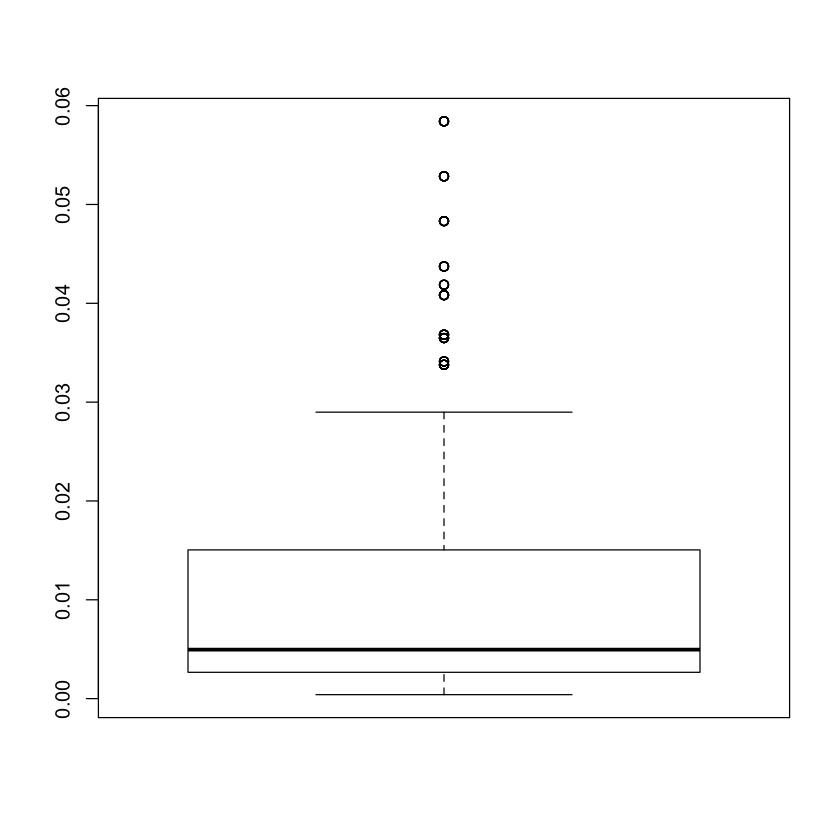

In [10]:
#save the output of boxplot
d <- boxplot(train$Displacement,varwidth = T,outline = T,border = T,plot = T)
d$out #enlist outlier observations